# **Classifying cats and dogs using deep learning**

### Clear session

In [5]:
!ls -la

!rm kagglecatsanddogs_3367a.zip* ngrok-stable-linux-amd64.zip* *.pickle readme[1].txt 'MSR-LA - 3467.docx'
!rm -rf ngrok/ 
!rm -rf PetImages/ 
!rm -rf logs/


!ls -la

total 34516
drwxr-xr-x 1 root root     4096 Jun  3 14:16 .
drwxr-xr-x 1 root root     4096 Jun  3 12:49 ..
drwxr-xr-x 1 root root     4096 May 30 16:09 .config
-rwxr-xr-x 1 root root 35326615 May 19 10:07 ngrok
drwxr-xr-x 1 root root     4096 May 24 16:08 sample_data
rm: cannot remove 'kagglecatsanddogs_3367a.zip*': No such file or directory
rm: cannot remove 'ngrok-stable-linux-amd64.zip*': No such file or directory
rm: cannot remove '*.pickle': No such file or directory
rm: cannot remove 'readme[1].txt': No such file or directory
rm: cannot remove 'MSR-LA - 3467.docx': No such file or directory
total 16
drwxr-xr-x 1 root root 4096 Jun  3 14:17 .
drwxr-xr-x 1 root root 4096 Jun  3 12:49 ..
drwxr-xr-x 1 root root 4096 May 30 16:09 .config
drwxr-xr-x 1 root root 4096 May 24 16:08 sample_data


## Data preparation

In [7]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2019-06-03 14:18:10--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.28.88.168, 2600:1408:8400:385::e59, 2600:1408:8400:3a9::e59
Connecting to download.microsoft.com (download.microsoft.com)|184.28.88.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   106MB/s    in 6.5s    

2019-06-03 14:18:17 (122 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]

--2019-06-03 14:18:18--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.60.111, 52.207.111.186, 3.209.102.29, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.60.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (1

In [0]:
!unzip kagglecatsanddogs_3367a.zip
!unzip ngrok-stable-linux-amd64.zip

In [9]:
!ls -la

total 856388
drwxr-xr-x 1 root root      4096 Jun  3 14:18  .
drwxr-xr-x 1 root root      4096 Jun  3 12:49  ..
drwxr-xr-x 1 root root      4096 May 30 16:09  .config
-rw-r--r-- 1 root root 824894548 Oct 13  2018  kagglecatsanddogs_3367a.zip
-rw-r--r-- 1 root root     35545 Feb 10  2017 'MSR-LA - 3467.docx'
-rwxr-xr-x 1 root root  35326615 May 19 10:07  ngrok
-rw-r--r-- 1 root root  16648024 Jun  3 14:18  ngrok-stable-linux-amd64.zip
drwxr-xr-x 4 root root      4096 Jun  3 14:18  PetImages
-rw-r--r-- 1 root root       104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root      4096 May 24 16:08  sample_data


## **Data Preprocessing**


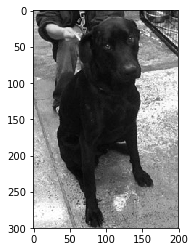

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2

DATADIR = '/content/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break

In [11]:
# Since the images currently are in different shapes, we need to normalize them
print(img_array.shape)

(300, 200)


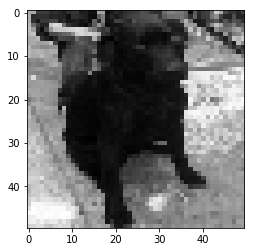

In [12]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [14]:
len(training_data)

24946

In [0]:
import random

random.shuffle(training_data)

In [16]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
0
1
1
0
0


In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

X = X/255.0

In [0]:
!ls -la

## Building a Convolutional Neural Network to classify our images

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

import time

In [43]:
NAME = "cats-vs-dogs-cnn-64x2-{}".format((int(time.time())))

LOG_DIR = 'logs/{}'.format(NAME)

tensorboard_cb = TensorBoard(log_dir=LOG_DIR)

# Using ngrok to perform a remote call to tensorboard
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://6e28c230.ngrok.io


In [0]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # This converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training step

In [45]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=[tensorboard_cb])

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 9s 405us/sample - loss: 0.6026 - acc: 0.6643 - val_loss: 0.5430 - val_acc: 0.7279
Epoch 2/10
22451/22451 [==============================] - 8s 377us/sample - loss: 0.5041 - acc: 0.7561 - val_loss: 0.5071 - val_acc: 0.7535
Epoch 3/10
22451/22451 [==============================] - 9s 379us/sample - loss: 0.4587 - acc: 0.7850 - val_loss: 0.4946 - val_acc: 0.7611
Epoch 4/10
22451/22451 [==============================] - 9s 384us/sample - loss: 0.4222 - acc: 0.8040 - val_loss: 0.4742 - val_acc: 0.7784
Epoch 5/10
22451/22451 [==============================] - 8s 375us/sample - loss: 0.3892 - acc: 0.8209 - val_loss: 0.4455 - val_acc: 0.7956
Epoch 6/10
22451/22451 [==============================] - 8s 376us/sample - loss: 0.3564 - acc: 0.8385 - val_loss: 0.4435 - val_acc: 0.7964
Epoch 7/10
22451/22451 [==============================] - 8s 373us/sample - loss: 0.3200 - acc: 0.8576 - val_lo

## Model Analysis